In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/EEG_data.csv')

In [ ]:
NewData =pd.DataFrame(columns=['SubjectID', 'VideoID','Attention_median','Theta_mean','Theta_median','Theta_mode','Theta_range','Theta_std','Theta_var','Theta_IQR', 'Alpha1_mean','Alpha1_median','Alpha1_mode','Alpha1_range','Alpha1_std','Alpha1_var','Alpha1_IQR', 'Alpha2_mean','Alpha2_median','Alpha2_mode','Alpha2_range','Alpha2_std','Alpha2_var','Alpha2_IQR'])

In [ ]:
NewData

,SubjectID,VideoID,Attention_median,Theta_mean,Theta_median,Theta_mode,Theta_range,Theta_std,Theta_var,Theta_IQR,...,Alpha1_std,Alpha1_var,Alpha1_IQR,Alpha2_mean,Alpha2_median,Alpha2_mode,Alpha2_range,Alpha2_std,Alpha2_var,Alpha2_IQR


In [ ]:
myData=data[['SubjectID','VideoID','Attention','Theta','Alpha1','Alpha2']]
myData.sort_values(by=['SubjectID', 'VideoID']);

In [ ]:
for i in range(10):
  for j in range(10):
    filter1 = myData["SubjectID"] == i
    filter2 = myData["VideoID"] == j
    newdf =myData.where(filter1 & filter2, inplace = False)
    newdf=newdf.dropna()
    #Attention data
    Attmedian=(newdf['Attention'].median())
    #Theta data
    Thetamean=(newdf['Theta'].mean())
    Thetamedian=(newdf['Theta'].median())
    Thetamode=((newdf['Theta'].mode()).mean())
    Thetarange=(newdf['Theta'].max()-newdf['Theta'].min())
    Thetastd=(newdf['Theta'].std())
    Thetavar=(newdf['Theta'].var())
    ThetaIQR=((newdf['Theta'].quantile([0.75])[0.75])-(newdf['Theta'].quantile([0.25])[0.25]))
    #Alpha1 data
    Alpha1mean=(newdf['Alpha1'].mean())
    Alpha1median=(newdf['Alpha1'].median())
    Alpha1mode=((newdf['Alpha1'].mode()).mean())
    Alpha1range=(newdf['Alpha1'].max()-newdf['Alpha1'].min())
    Alpha1std=(newdf['Alpha1'].std())
    Alpha1var=(newdf['Alpha1'].var())
    Alpha1IQR=((newdf['Alpha1'].quantile([0.75])[0.75])-(newdf['Alpha1'].quantile([0.25])[0.25]))
    #Alpha2 data
    Alpha2mean=(newdf['Alpha2'].mean())
    Alpha2median=(newdf['Alpha2'].median())
    Alpha2mode=((newdf['Alpha2'].mode()).mean())
    Alpha2range=(newdf['Alpha2'].max()-newdf['Alpha2'].min())
    Alpha2std=(newdf['Alpha2'].std())
    Alpha2var=(newdf['Alpha2'].var())
    Alpha2IQR=((newdf['Alpha2'].quantile([0.75])[0.75])-(newdf['Alpha2'].quantile([0.25])[0.25]))

    Rowdata={'SubjectID':i, 'VideoID':j, 
          'Attention_median':Attmedian,
          'Theta_mean':Thetamean,'Theta_median':Thetamedian,'Theta_mode':Thetamode,'Theta_range':Thetarange,'Theta_std':Thetastd,'Theta_var':Thetavar,'Theta_IQR':ThetaIQR,
          'Alpha1_mean':Alpha1mean,'Alpha1_median':Alpha1median,'Alpha1_mode':Alpha1mode,'Alpha1_range':Alpha1range,'Alpha1_std':Alpha1std,'Alpha1_var':Alpha1var,'Alpha1_IQR':Alpha1IQR,
          'Alpha2_mean':Alpha2mean,'Alpha2_median':Alpha2median,'Alpha2_mode':Alpha2mode,'Alpha2_range':Alpha2range,'Alpha2_std':Alpha2std,'Alpha2_var':Alpha2var,'Alpha2_IQR':Alpha2IQR}
    NewData=NewData.append(Rowdata, ignore_index = True)
    

In [ ]:
NewData

,SubjectID,VideoID,Attention_median,Theta_mean,Theta_median,Theta_mode,Theta_range,Theta_std,Theta_var,Theta_IQR,...,Alpha1_std,Alpha1_var,Alpha1_IQR,Alpha2_mean,Alpha2_median,Alpha2_mode,Alpha2_range,Alpha2_std,Alpha2_var,Alpha2_IQR
0,0.0,0.0,57.0,124965.590278,81382.5,124965.590278,1029881.0,163202.894870,2.663518e+10,113547.50,...,63481.774260,4.029936e+09,38614.75,25875.298611,14065.5,25875.298611,233815.0,36455.753230,1.329022e+09,24251.75
1,0.0,1.0,47.0,161064.228571,109448.0,161064.228571,826196.0,165275.364033,2.731595e+10,159941.75,...,39782.071142,1.582613e+09,42486.00,25078.935714,16974.5,25078.935714,221456.0,29358.051398,8.618952e+08,26703.00
2,0.0,2.0,43.5,149816.873239,96455.0,149816.873239,957235.0,166569.037286,2.774524e+10,157763.25,...,48986.981274,2.399724e+09,27804.50,21667.591549,13002.0,21667.591549,122532.0,22420.340376,5.026717e+08,23148.25
3,0.0,3.0,52.0,162653.360656,64971.0,162653.360656,1696851.0,260393.099616,6.780457e+10,142617.25,...,46917.197193,2.201223e+09,23909.75,26281.500000,12748.5,26281.500000,235114.0,39171.091745,1.534374e+09,24834.50
4,0.0,4.0,53.0,126893.948276,45817.5,126893.948276,1009030.0,181363.016596,3.289254e+10,107785.75,...,26936.614777,7.255812e+08,21237.00,17017.051724,10775.5,17017.051724,90226.0,18215.481472,3.318038e+08,17462.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.0,5.0,51.0,282487.512195,176070.0,282487.512195,1324433.0,284497.073806,8.093859e+10,332013.00,...,117544.850540,1.381679e+10,60303.00,40760.398374,23387.0,40760.398374,396568.0,59298.736067,3.516340e+09,35767.00
96,9.0,6.0,27.0,193226.870690,93990.0,193226.870690,1591630.0,255014.629883,6.503246e+10,199486.50,...,135330.535450,1.831435e+10,65976.50,44065.681034,23556.0,44065.681034,278036.0,54258.109173,2.943942e+09,43450.50
97,9.0,7.0,26.0,137478.267857,74496.0,137478.267857,1811067.0,224541.430387,5.041885e+10,94241.50,...,59632.287707,3.556010e+09,27377.75,28570.580357,18242.5,28570.580357,180749.0,33487.308076,1.121400e+09,24441.00
98,9.0,8.0,56.0,198926.048387,134007.5,198926.048387,1808890.0,229844.459988,5.282848e+10,191991.75,...,56829.441875,3.229585e+09,40276.50,25929.185484,14637.5,25929.185484,218985.0,30583.859464,9.353725e+08,31127.50


In [ ]:
corrnewdata=NewData[['Attention_median','Theta_mean','Theta_median','Theta_mode','Theta_range','Theta_std','Theta_var','Theta_IQR']]

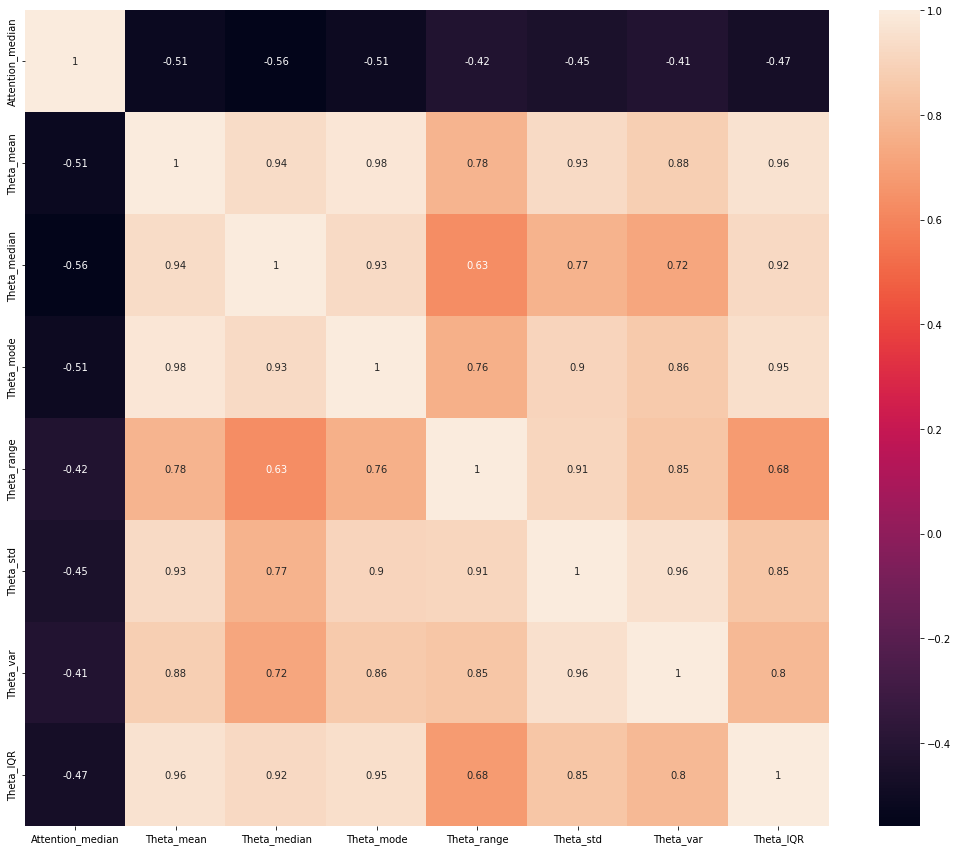

In [ ]:
corr = corrnewdata.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True)
plt.show()
#Att Median with Theta Median
#Att Mean with Theta Median
#Att Mode with Theta Median

In [ ]:
corrnewdata=NewData[['Attention_median','Alpha1_mean','Alpha1_median','Alpha1_mode','Alpha1_range','Alpha1_std','Alpha1_var','Alpha1_IQR']]

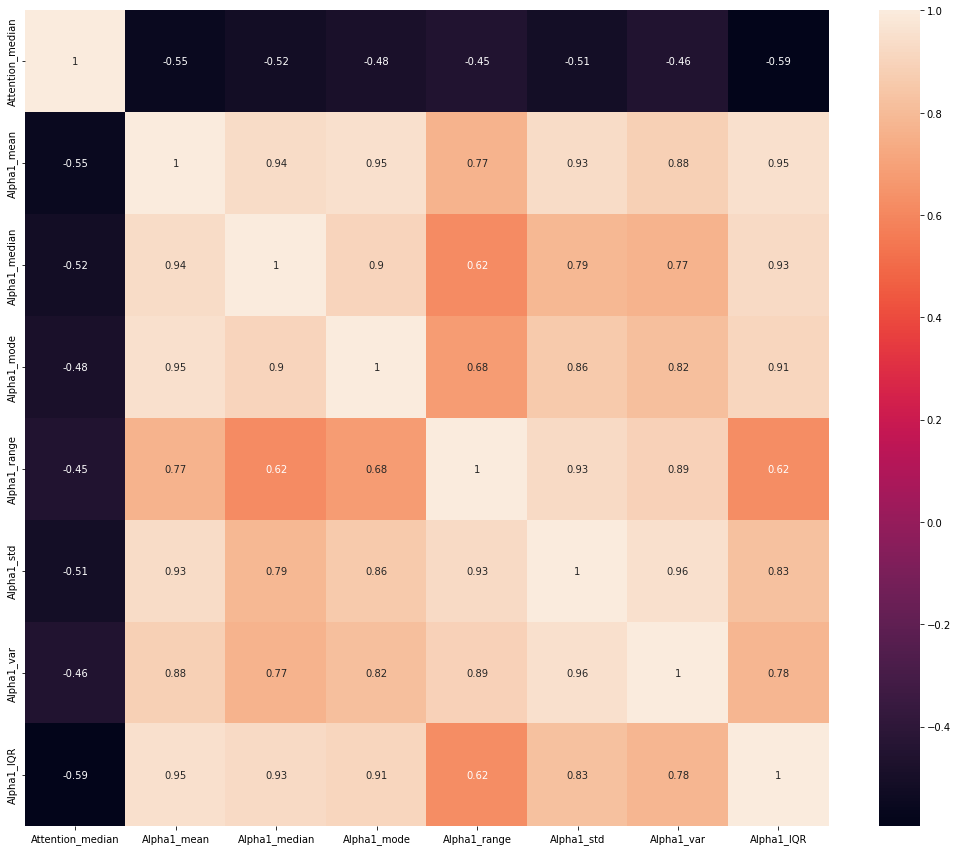

In [ ]:
corr = corrnewdata.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True)
plt.show()
#Attention Median with Alpha1 IQR
#Attention Mean with Alpha1 IQR
#Attention Median with Alpha Mean

In [ ]:
corrnewdata=NewData[['Attention_median','Alpha2_mean','Alpha2_median','Alpha2_mode','Alpha2_range','Alpha2_std','Alpha2_var','Alpha2_IQR']]

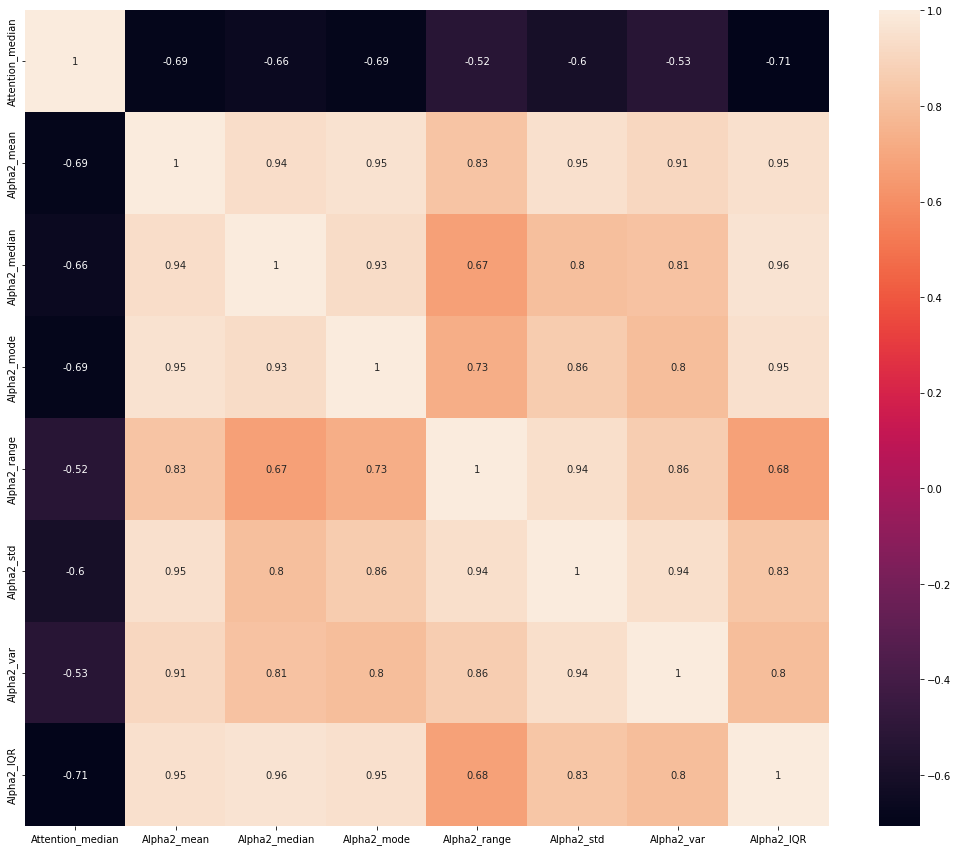

In [ ]:
corr = corrnewdata.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True)
plt.show()
#Attention Median with Alpha2 IQR
#Attention Mean with Alpha2 IQR


In [ ]:
Final_Cloumns = NewData[['Attention_median','Theta_mean','Theta_median','Theta_mode','Theta_range','Theta_std','Theta_var','Theta_IQR','Alpha1_mean','Alpha1_median','Alpha1_mode','Alpha1_range','Alpha1_std','Alpha1_var','Alpha1_IQR','Alpha2_mean','Alpha2_median','Alpha2_mode','Alpha2_range','Alpha2_std','Alpha2_var','Alpha2_IQR']]

In [ ]:
Final_Cloumns

,Attention_median,Theta_mean,Theta_median,Theta_mode,Theta_range,Theta_std,Theta_var,Theta_IQR,Alpha1_mean,Alpha1_median,...,Alpha1_std,Alpha1_var,Alpha1_IQR,Alpha2_mean,Alpha2_median,Alpha2_mode,Alpha2_range,Alpha2_std,Alpha2_var,Alpha2_IQR
0,57.0,124965.590278,81382.5,124965.590278,1029881.0,163202.894870,2.663518e+10,113547.50,36693.701389,13622.0,...,63481.774260,4.029936e+09,38614.75,25875.298611,14065.5,25875.298611,233815.0,36455.753230,1.329022e+09,24251.75
1,47.0,161064.228571,109448.0,161064.228571,826196.0,165275.364033,2.731595e+10,159941.75,34918.028571,23867.5,...,39782.071142,1.582613e+09,42486.00,25078.935714,16974.5,25078.935714,221456.0,29358.051398,8.618952e+08,26703.00
2,43.5,149816.873239,96455.0,149816.873239,957235.0,166569.037286,2.774524e+10,157763.25,30493.873239,18521.0,...,48986.981274,2.399724e+09,27804.50,21667.591549,13002.0,21667.591549,122532.0,22420.340376,5.026717e+08,23148.25
3,52.0,162653.360656,64971.0,162653.360656,1696851.0,260393.099616,6.780457e+10,142617.25,33367.278689,15899.5,...,46917.197193,2.201223e+09,23909.75,26281.500000,12748.5,26281.500000,235114.0,39171.091745,1.534374e+09,24834.50
4,53.0,126893.948276,45817.5,126893.948276,1009030.0,181363.016596,3.289254e+10,107785.75,23113.844828,14845.5,...,26936.614777,7.255812e+08,21237.00,17017.051724,10775.5,17017.051724,90226.0,18215.481472,3.318038e+08,17462.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,51.0,282487.512195,176070.0,282487.512195,1324433.0,284497.073806,8.093859e+10,332013.00,70498.089431,35332.0,...,117544.850540,1.381679e+10,60303.00,40760.398374,23387.0,40760.398374,396568.0,59298.736067,3.516340e+09,35767.00
96,27.0,193226.870690,93990.0,193226.870690,1591630.0,255014.629883,6.503246e+10,199486.50,74629.129310,29970.5,...,135330.535450,1.831435e+10,65976.50,44065.681034,23556.0,44065.681034,278036.0,54258.109173,2.943942e+09,43450.50
97,26.0,137478.267857,74496.0,137478.267857,1811067.0,224541.430387,5.041885e+10,94241.50,37676.383929,16918.5,...,59632.287707,3.556010e+09,27377.75,28570.580357,18242.5,28570.580357,180749.0,33487.308076,1.121400e+09,24441.00
98,56.0,198926.048387,134007.5,198926.048387,1808890.0,229844.459988,5.282848e+10,191991.75,42279.814516,21442.0,...,56829.441875,3.229585e+09,40276.50,25929.185484,14637.5,25929.185484,218985.0,30583.859464,9.353725e+08,31127.50


In [ ]:
result = []
for value in Final_Cloumns['Attention_median']:
    if value >= 50:
        result.append('1')
    else:
        result.append('0')

Final_Cloumns["Result"] = result  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Final_Cloumns

,Attention_median,Theta_mean,Theta_median,Theta_mode,Theta_range,Theta_std,Theta_var,Theta_IQR,Alpha1_mean,Alpha1_median,...,Alpha1_var,Alpha1_IQR,Alpha2_mean,Alpha2_median,Alpha2_mode,Alpha2_range,Alpha2_std,Alpha2_var,Alpha2_IQR,Result
0,57.0,124965.590278,81382.5,124965.590278,1029881.0,163202.894870,2.663518e+10,113547.50,36693.701389,13622.0,...,4.029936e+09,38614.75,25875.298611,14065.5,25875.298611,233815.0,36455.753230,1.329022e+09,24251.75,1
1,47.0,161064.228571,109448.0,161064.228571,826196.0,165275.364033,2.731595e+10,159941.75,34918.028571,23867.5,...,1.582613e+09,42486.00,25078.935714,16974.5,25078.935714,221456.0,29358.051398,8.618952e+08,26703.00,0
2,43.5,149816.873239,96455.0,149816.873239,957235.0,166569.037286,2.774524e+10,157763.25,30493.873239,18521.0,...,2.399724e+09,27804.50,21667.591549,13002.0,21667.591549,122532.0,22420.340376,5.026717e+08,23148.25,0
3,52.0,162653.360656,64971.0,162653.360656,1696851.0,260393.099616,6.780457e+10,142617.25,33367.278689,15899.5,...,2.201223e+09,23909.75,26281.500000,12748.5,26281.500000,235114.0,39171.091745,1.534374e+09,24834.50,1
4,53.0,126893.948276,45817.5,126893.948276,1009030.0,181363.016596,3.289254e+10,107785.75,23113.844828,14845.5,...,7.255812e+08,21237.00,17017.051724,10775.5,17017.051724,90226.0,18215.481472,3.318038e+08,17462.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,51.0,282487.512195,176070.0,282487.512195,1324433.0,284497.073806,8.093859e+10,332013.00,70498.089431,35332.0,...,1.381679e+10,60303.00,40760.398374,23387.0,40760.398374,396568.0,59298.736067,3.516340e+09,35767.00,1
96,27.0,193226.870690,93990.0,193226.870690,1591630.0,255014.629883,6.503246e+10,199486.50,74629.129310,29970.5,...,1.831435e+10,65976.50,44065.681034,23556.0,44065.681034,278036.0,54258.109173,2.943942e+09,43450.50,0
97,26.0,137478.267857,74496.0,137478.267857,1811067.0,224541.430387,5.041885e+10,94241.50,37676.383929,16918.5,...,3.556010e+09,27377.75,28570.580357,18242.5,28570.580357,180749.0,33487.308076,1.121400e+09,24441.00,0
98,56.0,198926.048387,134007.5,198926.048387,1808890.0,229844.459988,5.282848e+10,191991.75,42279.814516,21442.0,...,3.229585e+09,40276.50,25929.185484,14637.5,25929.185484,218985.0,30583.859464,9.353725e+08,31127.50,1


In [ ]:
# from google.colab import files
# Final_Cloumns.to_csv('EEG_Final_Columns.csv') 
# files.download('EEG_Final_Columns.csv')

In [ ]:
Final_Cloumns['Result'].value_counts()

0    60
1    40
Name: Result, dtype: int64

In [ ]:
y=Final_Cloumns.pop('Result')
Final_Cloumns=Final_Cloumns.drop(columns=['Attention_median'])
Final_Cloumns.head()

,Theta_mean,Theta_median,Theta_mode,Theta_range,Theta_std,Theta_var,Theta_IQR,Alpha1_mean,Alpha1_median,Alpha1_mode,...,Alpha1_std,Alpha1_var,Alpha1_IQR,Alpha2_mean,Alpha2_median,Alpha2_mode,Alpha2_range,Alpha2_std,Alpha2_var,Alpha2_IQR
0,124965.590278,81382.5,124965.590278,1029881.0,163202.894870,2.663518e+10,113547.50,36693.701389,13622.0,36693.701389,...,63481.774260,4.029936e+09,38614.75,25875.298611,14065.5,25875.298611,233815.0,36455.753230,1.329022e+09,24251.75
1,161064.228571,109448.0,161064.228571,826196.0,165275.364033,2.731595e+10,159941.75,34918.028571,23867.5,34918.028571,...,39782.071142,1.582613e+09,42486.00,25078.935714,16974.5,25078.935714,221456.0,29358.051398,8.618952e+08,26703.00
2,149816.873239,96455.0,149816.873239,957235.0,166569.037286,2.774524e+10,157763.25,30493.873239,18521.0,30493.873239,...,48986.981274,2.399724e+09,27804.50,21667.591549,13002.0,21667.591549,122532.0,22420.340376,5.026717e+08,23148.25
3,162653.360656,64971.0,162653.360656,1696851.0,260393.099616,6.780457e+10,142617.25,33367.278689,15899.5,33367.278689,...,46917.197193,2.201223e+09,23909.75,26281.500000,12748.5,26281.500000,235114.0,39171.091745,1.534374e+09,24834.50
4,126893.948276,45817.5,126893.948276,1009030.0,181363.016596,3.289254e+10,107785.75,23113.844828,14845.5,23113.844828,...,26936.614777,7.255812e+08,21237.00,17017.051724,10775.5,17017.051724,90226.0,18215.481472,3.318038e+08,17462.25


In [ ]:
scaler = StandardScaler()
X=scaler.fit_transform(Final_Cloumns)
print(X)

[[-0.48953219 -0.26995565 -0.4293723  ... -0.1940283  -0.33084397
  -0.25770429]
 [-0.08095119  0.20095288 -0.03756981 ... -0.41588613 -0.43288043
  -0.1675871 ]
 [-0.20825394 -0.01705551 -0.15964483 ... -0.63274302 -0.51134713
  -0.29827311]
 ...
 [-0.34790795 -0.38550362 -0.2935639  ... -0.28681507 -0.37619575
  -0.25074675]
 [ 0.3475863   0.61303454  0.37336966 ... -0.37757019 -0.41683048
  -0.00492579]
 [-0.06471541 -0.48594218 -0.02200075 ...  0.25740135 -0.05527205
  -0.04859196]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

# from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
logregAccuracy = logreg_cv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(logregAccuracy) )

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
Accuracy for our training dataset with tuning is : 72.86%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [ ]:
knn = KNeighborsClassifier()
# from sklearn.model_selection import GridSearchCV
k_range = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 13}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 74.29%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
print(CV_rfc.best_params_)
accuracy = CV_rfc.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
Accuracy for our training dataset with tuning is : 80.00%


In [ ]:
from sklearn.svm import SVC


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
accuracy = grid.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 77.14%


In [ ]:
param_grid_full = [
  {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
  {'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
 ]

grid_full = GridSearchCV(SVC(), param_grid_full, cv = 10, scoring='accuracy') 
grid_full.fit(x_train, y_train) 

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['sigmoid']}],
             scoring='accuracy')

In [ ]:
print(grid_full.best_params_)


{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}


In [ ]:
grid_predictions = grid_full.predict(x_test) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.57
